In [ ]:
# Load interactive tools!
include("util/FrequencyDomainMethods.jl")
using .FrequencyDomainMethods: interactive_root_locus, diagonal_root_locus
using Plots, Interact, Printf
plotly() 

WebIO._IJuliaInit()

Plots.PlotlyBackend()

## Frequency Domain Methods
#### Source: Space Vehicle Dynamics and Control, Second Edition, Chapter 2, Bong Wie
---
### Root Locus Method
In Evan's root locus method, the closed-loop characteristic equation is described by 
$$
1 + KG(s) =0
$$
where $KG(s)$ denotes the loop transfer function, $G(s)$ includes both the compensator transfer function and the plant transfer function, and $K$ is called the overall loop gain. The root locus method can be used to determine gain margins of feedback control systems.

The root locus method can be emplyed for the analysis and design of multiloop feedback systems. Such systems can be described by
$$
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
=
\frac{1}{D(s)}
\begin{bmatrix}
N_{11}(s) & N_{12}(s) \\
N_{21}(s) & N_{22}(s)
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}
$$

Where $N_{ij}(s)$ are the numerator polynomials, $D(s)$ is the characteristic polynomial, $u_i$ and $y_i$ are the input and output, respectively. $N/D$ can be interpreted as the physical plant transfer function, $G(s)$. 


---
### Diagonal Feedback Control
A diagonal feedback control logic is assumed as 
$$
u_1=-K_1(s)y_1 \\
u_2=-K_2(s)y_2
$$
where $K_1(s)$ and $K_2(s)$ are the diagonal feedback compensators.The characteristic equation for this system can be obtained by making substitutions for the input and taking $det(I+KG)=0$. 

Control loop gain design for diagonal feedback controllers can be synthesized by considering the first-loop independently, introducing coupling only through the second loop. 
First loop analysis or synthesis can be performed by considering a characteristic equaton of the form
$$
1+(K_1N_{11}/D)=0
$$
After synthesizing $K_1(s)$ in the first-loop closure, the characteristic equation of the second-loop can be found as
$$
1+\frac{K_2(N_{22}+K_1N)}{D+K_1N_{11}}=0
$$
Where $N(s)$ is the coupling numerator
$$
N = \frac{N_{11}N_{22} - N_{12}N_{21}}{D(s)}
$$
The second-loop compensator $K_2(s)$ can then be analyzed or synthesized in a manner similiar to the method for the first-loop design; however, the zeros and the poles of the second-loop transfer function are changed by the first-loop closure.

---


### Problem 2.1
Consider a system described by
$$
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
=
\frac{1}{s^2+100}
\begin{bmatrix}
s-100 & 10(s+1) \\
-10(s+1) & s-100
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}
$$

where $(y_1, y_2)$ are the outputs and $(u_1,u2)$ are the control inputs. A constant gain diagonal feedback control logic is given as

$$
u_1=-K_1y_1 \\
u_2=-K_2y_2
$$

with the nominal gains of $K_1=K_2=1$.

#### a) Sketch the root locus vs $K_1$ of the first-loop closure and indicate the closed-loop poles at $K_1=0.9, 1.0, 1.1$.

Evaluate the first-loop characteristic equation
$$
1+(K_1N_{11}/D)= 1+\frac{K_1(s-100)}{s^2+100} =0\\
s^2+100+K_1(s-100)=0\\
s^2 +K_1s +100(1-K_1) =0
$$

Employ quadratic formula to solve for roots
$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\ 
 .\\.\\\\
s = \frac{-K_1 \pm \sqrt{K_1^2 - 400(1-K_1)}}{2}
$$

Let's take this problem a bit further than a few values of $K_1$...

In [2]:
# First-loop quadratic roots from derivation above
first_roots(K1) = [
    (-K1 + sqrt(Complex(K1^2 - 400*(1 - K1))))/2,
    (-K1 - sqrt(Complex(K1^2 - 400*(1 - K1))))/2
]

interactive_root_locus(first_roots, -2:.05:2)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 81, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(41), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rma/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x000000010b5f5910, Task (runnable, started) @0x000000010b5f5910), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.95\",\"-1.9\",\"-1.85\",\"-1.8\",\"-1.75\",\"-1.7\",\"-1.65\",\"-1.6\",\"-1.55\",\"-1.5\",\"-1.45\",\"-1.4\",\"-1.35\",\"-1.3\",\"-1.25\",\"-1

- It appears the system is gain stable between values of $0<=K_1<=1$, with values outside of this range crossing over the imaginary axis. 
- For stability.. ideally this whole chart would be shifted left. Seems like a small margin, but it may be relatively high depending on the underlying system! Although the locus circle could be more left..
- Shifting left would require a reduction in the first order term in the characteristic equation.. Add more damping to the system? Just tried multiplying the $b$ term by 10 and it stretches the curve left but the gain margin is still the exact same.. so that will stretch but not shift.

In [3]:
interactive_root_locus(first_roots, -600:10:400)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(51), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rma/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x0000000312519140, Task (runnable, started) @0x0000000312519140), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 143187411578)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-600\",\"-590\",\"-580\",\"-570\",\"-560\",\"-550\",\"-540\",\"-530\",\"-520\",\"-510\",\"-500\",\"-490\",\"-480\",\"-470\",\"-460\",\"-450\",

Take a look the behavior as you increase $K_1$ to arbitrarily large values! As gain increases, the negative zero approaches infinity while the positive zero approaches some constant value. As Gain decreases, the zeros make a circle in the imaginary part into the right half s-plane. Then when they converge back on the real axis one zero goes to infinity while another goes to some finite positive value.

There is a beautiful symmetry to quadratic roots.
- Is it possible for asymptotic roots to cross on the real axis?
- Why is the magnitude of difference in the imaginary axis larger when roots are closer to the real axis? Can it be explained using Euler's formula?

#### b) Show that, after first loop closure, the closed-loop characteristic equation for the second-loop closure becomes
$$
1+K_2\begin{bmatrix}\frac{s+(101K_1-100)}{s^2+K_1s+100(1-K_1)}\end{bmatrix}=0
$$
#### where the coupling numerator polynomial, $N(s)=101$.

No thanks, I trust your algebra, Wie!


#### c) After selecting the nominal gain $(K_1=1)$ for the first-loop closure, sketch the root locus vs $K_2$ of the second-loop closure and indicate the closed-loop poles at $K_2=0.5, 1.0, 10$.

Rearrange the second-loop characteristic equation

$$
s^2+K_1s+100(1-K_1)+K_2s+K_2(101K_1-100) = 0 \\
s^2+K_1s+100-100K_1+K_2s+101K_2K_1-K_2100 = 0 \\
s^2 + (K_1+K_2)s + 101K_1K_2 - 100(K_1+K_2) + 100=0 \\
.\\.\\
s = \frac{-(K_1+K_2)\pm\sqrt{(K_1+K_2)^2-400(K_1K_2 -(K_1+K_2) + 1)-4K_1K_2}}{2}
$$

In [4]:
# Second-loop quadratic roots from derivation above
second_roots(K1, K2) = [
    (-(K1 + K2) + sqrt(Complex((K1+K2)^2 - 400*(K1*K2 - (K1+K2) + 1) - 4*K1*K2)))/2,
    (-(K1 + K2) - sqrt(Complex((K1+K2)^2 - 400*(K1*K2 - (K1+K2) + 1) - 4*K1*K2)))/2
]
second_roots_nominal(K2) = second_roots(1, K2)
interactive_root_locus(second_roots_nominal, -10:.1:10)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(101), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rma/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x000000032b3ea0e0, Task (runnable, started) @0x000000032b3ea0e0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (256, 0, 13585241072)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-10.0\",\"-9.9\",\"-9.8\",\"-9.7\",\"-9.6\",\"-9.5\",\"-9.4\",\"-9.3\",\"-9.2\",\"-9.1\",\"-9.0\",\"-8.9\",\"-8.8\",\"-8.7\",\"-8.6\",\"-8.5

- It appears the system is stable when $K_2>=0$, possibly up to infinity. 
- Interestingly, at least one of the roots is always $-1$, swapping at $K_2=-1$. For $K_2>=-1$, approaching the stable direction, the first root is positive. For $K_2<=-1$, going into instability, the second root is $-1$.
- Furthermore, the root that isn't $-1$ is always equal to the negative of the value of $K_2$!

In [5]:
# Try decreasing K1 gain
second_roots_lowerK1(K2) = second_roots(0.9, K2)
interactive_root_locus(second_roots_lowerK1, -2:.1:2)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 41, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(21), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rma/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x000000010b5f7850, Task (runnable, started) @0x000000010b5f7850), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (4493553552, 4336834496, 13628649872)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.9\",\"-1.8\",\"-1.7\",\"-1.6\",\"-1.5\",\"-1.4\",\"-1.3\",\"-1.2\",\"-1.1\",\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"

Ok, back in circle form. 
- Second-loop stability margins are between $-0.9<=K_2<=1.1$

So moving first-loop away from maximum stable gain into stable territory then bounds the gain margin in the second-loop?

In [6]:
# Try increasing K1 gain
second_roots_higherK1(K2) = second_roots(1.1, K2) # first-loop no longer stable..
interactive_root_locus(second_roots_higherK1, -2:.1:200)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 2021, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1011), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rma/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rma/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rma/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x0000000314f5eef0, Task (runnable, started) @0x0000000314f5eef0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (4336802688, 4336784768, 145749296035)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.9\",\"-1.8\",\"-1.7\",\"-1.6\",\"-1.5\",\"-1.4\",\"-1.3\",\"-1.2\",\"-1.1\",\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7

I assumed this would be inherently unstable since $K_1$ is pushed outside stability!
- Stability margins between $0.9<=K_2<=\infty?$
- Yeah, looks like, for increasing $K_2$, $-11.67$ is root limit while other one goes to $-\infty$

So an unstable first loop opens up boundless stability for second loop?? 
- Well second loop already had a boundless stability, it's just been moved.
- It appears that increasing the first-loop gain cuts stability margins for the second-loop by a little bit.
- Decreasing the first-loop gain cuts the stability of the second-loop significantly! From unbounded to bounded.

Certainly one can conclude that gain stability is can be diminished on both sides, thus underscoring the importance of margin analysis.

Let's coplot various selections of $K_1$ against $K_2$ and observe the change in stability margins.

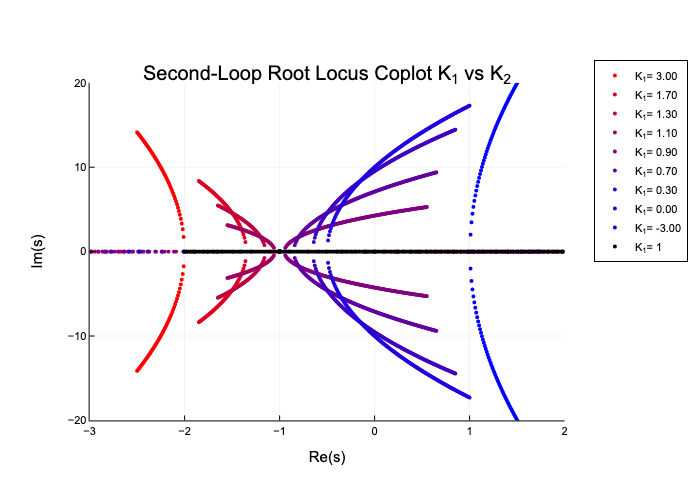

In [13]:
plt = plot(xlabel="Re(s)", ylabel="Im(s)", legend = :outertopright,
            title="Second-Loop Root Locus Coplot K<sub>1</sub> vs K<sub>2</sub>", 
            xlimits=(-3,2), ylimits=(-20,20))

colormap = cgrad([:red, :blue], 9, categorical=true)
k1_values = [3, 1.7, 1.3, 1.1, 0.9, 0.7, 0.3, 0, -3]
k2_range = -2:.02:2;

for (i, K1) in enumerate(k1_values)
    diagonal_root_locus(second_roots, K1, k2_range, plt, color=colormap[i], label=@sprintf("K<sub>1</sub>= %.2f", K1))
end
diagonal_root_locus(second_roots, 1, k2_range, plt, color="black", label="K<sub>1</sub>= 1")


Click on the legend entries to toggle on and off each $K_1$ condition!

The root manifold gives the impression of a cone passing and rotating through the 2D $Re-Im$ plane.
- Increasing $K_1$ pushes the second-loop stable portion deeper into the negative real axis.
- The shape widens and shifts left or right if far enough from the flatline gain.
- What is the significance of the flatline condition?
- No matter what, for a $K_1$ of anything, $K_2=1$ will always yield a root at $-1$!
- Wow, when plotted for very large range of $K_2$ (below), they give the impression of magnetic potentionals.
- Is that why they're called poles??


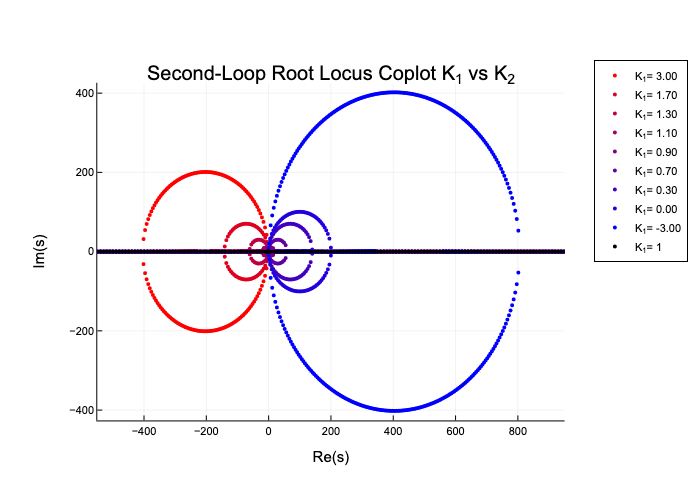

In [17]:
plt = plot(xlabel="Re(s)", ylabel="Im(s)", legend = :outertopright,
            title="Second-Loop Root Locus Coplot K<sub>1</sub> vs K<sub>2</sub>",
            xlimits=(-550,950))

colormap = cgrad([:red, :blue], 9, categorical=true)
k1_values = [3, 1.7, 1.3, 1.1, 0.9, 0.7, 0.3, 0, -3]
k2_range = -2000:10:2000;

for (i, K1) in enumerate(k1_values)
    diagonal_root_locus(second_roots, K1, k2_range, plt, color=colormap[i], label=@sprintf("K<sub>1</sub>= %.2f", K1))
end
diagonal_root_locus(second_roots, 1, k2_range, plt, color="black", label="K<sub>1</sub>= 1")